In [1]:
# Author: Ken Youens-Clark
# Purpose: Demonstrate how to use Virz API to get data

import pandas as pd
import requests
import matplotlib.pyplot as plt

In [7]:
# This is the Virz API running somewhere, it will return JSON
url = 'http://35.245.126.160/query?meta__bio_project=PRJEB24383'
r = requests.get(url)
if r.status_code != 200:
    print("error getting data")

In [8]:
# Pandas can read JSON into a data frame!
df = pd.DataFrame(r.json())

# Drop the "_id" column that Mongo assigns to each record
df.drop(columns=['_id'], inplace=True)

# Look at the first few records
print(df.head())

    accession               contig  covered_length  length meta__accession  \
0  ERR2244207   Contig_817_55.1438           10046   10046      ERR2244207   
1  ERR2244207   Contig_817_55.1438           10046   10046      ERR2244207   
2  ERR2244207  Contig_1173_35.9183           11349   11349      ERR2244207   
3  ERR2244207  Contig_1173_35.9183           11349   11349      ERR2244207   
4  ERR2244207   Contig_817_55.1438           10046   10046      ERR2244207   

  meta__bio_project meta__bio_sample          meta__center meta__common_name  \
0        PRJEB24383             None  UNIVERSITY OF OXFORD              None   
1        PRJEB24383             None  UNIVERSITY OF OXFORD              None   
2        PRJEB24383             None  UNIVERSITY OF OXFORD              None   
3        PRJEB24383             None  UNIVERSITY OF OXFORD              None   
4        PRJEB24383             None  UNIVERSITY OF OXFORD              None   

          meta__contig      ...       perc50 sampl

In [11]:
# Get a list of unique tax IDs
df['sample__btax'].unique()

array(['1273712', '130478', '10710', '687345', '320845'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122809b00>]],
      dtype=object)

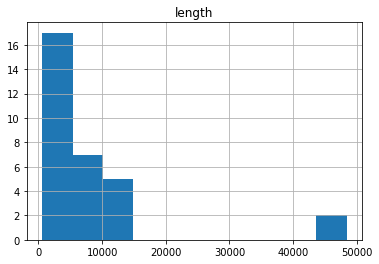

In [12]:
# View a histogram of the lengths
df.hist('length')